# Nipams Perform Experiments & Collect Results

In [1]:
# all200_dec13, all200_feb25_hb2
RUN_NAME = "all1e6_mar22"         #@param{"type":"string"}
# DATA_NAME = "all200_feb25_hb2"
DATA_NAME = "sub1_100_hb"         #@param{"type":"string"}
# MAT_PATTERN : '(LV|res|rec|bre)\d+.mat' , "\d+.mat"
MAT_PATTERN = "sub1.*.mat"        #@param
LIMIT = 100         #@param
CONCAT_HEARTBEATS_NUM = None              #@param
# CONCAT_HEARTBEATS_NUM = None
REPROCESS = True                  #@param
FILE_PROCESSED = f'data/interim/{DATA_NAME}.pickle'
GBQ_INPUTS_TABLE = f'inputs.imu_{DATA_NAME}'
GBQ_RESULTS_TABLE = f'predictions.results_{RUN_NAME}'

# 0. Initialize

In [3]:
#@title Connect to gDrive & Load Files
ENV_COLAB = 'google.colab' in str(get_ipython())
if ENV_COLAB:
    print('Running on CoLab')
    PROJECT_DRIVE_FOLDER= "/content/drive/MyDrive/NiPAMS/BP development/analysis/nipams-bp-py-main/" #@param {"type":"string"}
    ## Load this for local development version of library.. Loads from GoogleDrive (changes persist)
    from google.colab import drive, widgets, data_table; 
    drive.mount('/content/drive');
    %cd "$PROJECT_DRIVE_FOLDER"
  
    # !pip install -qr requirements.txt
    # !cat requirements.txt | xargs -n 1 pip install -q
    !pip install -q envyaml
    import os, sys; 
    from envyaml import EnvYAML; env = EnvYAML('env/default.yml'); 
    for k,v in env.export().items(): os.environ[k]=str(v)
    sys.path.append(os.path.abspath("./src"))
    sys.path.append(os.path.abspath(f"{PROJECT_DRIVE_FOLDER}"))

else:
    print('Not running on CoLab')
    %cd /app
!pwd

from importlib import reload;
from utils.constants import *

Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1MnayBGJfAervEVUyYNEibuPedW7NJuzm/NiPAMS/BP development/analysis/nipams-bp-py-main
/content/drive/.shortcut-targets-by-id/1MnayBGJfAervEVUyYNEibuPedW7NJuzm/NiPAMS/BP development/analysis/nipams-bp-py-main


# 1. Load & Process Data

In [4]:
from src.data import load_data; reload(load_data)
from src.data import preprocess;

if REPROCESS:
  _dfBp, _dfImu = load_data.load_dataframe_from_mat(folder='data/raw_mat/', pattern=MAT_PATTERN, limit_files=LIMIT)

  dfAll = preprocess.merge_imu_vcg_with_heartbeats(_dfBp, _dfImu)
  dfAll[IMU_DATA_COLS] = dfAll[IMU_DATA_COLS].astype(np.float32)
  dfAll[BP_COLS] = dfAll[BP_COLS].astype(np.float32)
  dfAll.to_pickle(path=FILE_PROCESSED)
  
  # OPTIONALLY SAVE INPUT DATA TO BIG QUERY
  # dfImuGbq = dfImu.copy()
  # dfImuGbq.ts = dfImuGbq.ts.astype(int)/1e9
  # dfImuGbq.to_gbq(f'inputs.imu_{DATA_NAME}','nipams', if_exists='replace', table_schema=None)
  # dfBp.to_gbq(f'inputs.bp_{DATA_NAME}','nipams', if_exists='replace', table_schema=None)


In [ ]:
# dfBp, dfImu = load_data.load_dataframe_from_mat(folder='data/raw_mat/', pattern='LLV', limit_files=30)
dfAll = load_data.load_dataframe_from_pickle(path=FILE_PROCESSED)
dfImu = dfAll[INDICIES + INFO_COLS + IMU_COLS]
dfBp = dfAll[INDICIES + INFO_COLS + BP_COLS].drop_duplicates()

'------ dfAll ------'

'Unique Files : '

199

array(['sub019_HLV1.mat', 'sub019_HLV2.mat', 'sub019_HLV3.mat',
       'sub019_LLV1.mat', 'sub019_LLV2.mat', 'sub019_LLV3.mat',
       'sub019_bre1.mat', 'sub019_rec1.mat', 'sub019_rec2.mat',
       'sub019_res1.mat', 'sub019_res2.mat', 'sub112_HLV1.mat',
       'sub112_HLV2.mat', 'sub112_HLV3.mat', 'sub112_LLV1.mat',
       'sub112_LLV2.mat', 'sub112_LLV3.mat', 'sub112_bre1.mat',
       'sub112_rec1.mat', 'sub112_rec2.mat', 'sub112_res1.mat',
       'sub112_res2.mat', 'sub115_HLV1.mat', 'sub115_HLV2.mat',
       'sub115_HLV3.mat', 'sub115_LLV1.mat', 'sub115_LLV2.mat',
       'sub115_LLV3.mat', 'sub115_bre1.mat', 'sub115_rec1.mat',
       'sub115_rec2.mat', 'sub115_res1.mat', 'sub115_res2.mat',
       'sub133_HLV1.mat', 'sub133_HLV2.mat', 'sub133_HLV3.mat',
       'sub133_LLV1.mat', 'sub133_LLV2.mat', 'sub133_LLV3.mat',
       'sub133_bre1.mat', 'sub133_rec1.mat', 'sub133_rec2.mat',
       'sub133_res1.mat', 'sub133_res2.mat', 'sub176_HLV1.mat',
       'sub176_HLV2.mat', 'sub176_HLV3.m

,file,ax,ay,az,gx,gy,gz,heartbeat,patient,test_type,test_num,tsCC,ts,pp,sbp,dbp
0,sub019_HLV1.mat,-1.089362,1.668758,-9.832985,1.037598,0.259399,0.053406,3.0,sub019,HLV,1,True,0 days 00:00:01.991000,62.045975,122.860863,60.814892
1,sub019_HLV1.mat,-1.012747,1.644816,-9.797072,1.289368,0.091553,-0.053406,3.0,sub019,HLV,1,True,0 days 00:00:01.996000,62.045975,122.860863,60.814892
2,sub019_HLV1.mat,-1.012747,1.632845,-9.829394,1.144409,0.480652,-0.221252,3.0,sub019,HLV,1,True,0 days 00:00:02.001000,62.045975,122.860863,60.814892
3,sub019_HLV1.mat,-1.023521,1.663970,-9.848548,1.296997,-0.476837,-0.026703,3.0,sub019,HLV,1,True,0 days 00:00:02.006000,62.045975,122.860863,60.814892
4,sub019_HLV1.mat,-1.039083,1.649605,-9.947906,1.518250,-0.831604,-0.411987,3.0,sub019,HLV,1,True,0 days 00:00:02.011000,62.045975,122.860863,60.814892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109758,sub267_HLV2.mat,1.173159,1.845929,-9.873687,-0.007629,2.197266,0.091553,25.0,sub267,HLV,2,True,0 days 00:00:57.805000,64.464264,147.161850,82.697586
5109759,sub267_HLV2.mat,1.189918,1.874660,-9.897629,-0.526428,2.258301,0.106812,25.0,sub267,HLV,2,True,0 days 00:00:57.810000,64.464264,147.161850,82.697586
5109760,sub267_HLV2.mat,1.205480,1.856703,-9.850942,-0.488281,2.281189,0.007629,25.0,sub267,HLV,2,True,0 days 00:00:57.815000,64.464264,147.161850,82.697586
5109761,sub267_HLV2.mat,1.189918,1.860294,-9.842562,-0.503540,2.326965,0.198364,25.0,sub267,HLV,2,True,0 days 00:00:57.820000,64.464264,147.161850,82.697586


In [ ]:
#@title Display Data Summaries
display('------ Data Summaries ------')
display("Unique Files : ", dfAll.file.nunique())
# print("\n np.unique(dfAll.file)"); display(np.unique(dfAll.file))
print("\n dfAll"); display(dfAll)
print("\n dfImu.describe()"); display(dfImu.describe())
print("\n dfBp.describe()"); display(dfBp.describe())


dfTmp = dfImu.groupby('test_type').describe()
dfTmp.to_csv(sep='\t')

dfTmp = dfBp.groupby('test_type').describe()
dfTmp.to_csv(sep='\t')

'------ Data Summaries ------'

'Unique Files : '

199


 dfAll


,file,ax,ay,az,gx,gy,gz,heartbeat,patient,test_type,test_num,tsCC,ts,pp,sbp,dbp
0,sub019_HLV1.mat,-1.089362,1.668758,-9.832985,1.037598,0.259399,0.053406,3.0,sub019,HLV,1,True,0 days 00:00:01.991000,62.045975,122.860863,60.814892
1,sub019_HLV1.mat,-1.012747,1.644816,-9.797072,1.289368,0.091553,-0.053406,3.0,sub019,HLV,1,True,0 days 00:00:01.996000,62.045975,122.860863,60.814892
2,sub019_HLV1.mat,-1.012747,1.632845,-9.829394,1.144409,0.480652,-0.221252,3.0,sub019,HLV,1,True,0 days 00:00:02.001000,62.045975,122.860863,60.814892
3,sub019_HLV1.mat,-1.023521,1.663970,-9.848548,1.296997,-0.476837,-0.026703,3.0,sub019,HLV,1,True,0 days 00:00:02.006000,62.045975,122.860863,60.814892
4,sub019_HLV1.mat,-1.039083,1.649605,-9.947906,1.518250,-0.831604,-0.411987,3.0,sub019,HLV,1,True,0 days 00:00:02.011000,62.045975,122.860863,60.814892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109758,sub267_HLV2.mat,1.173159,1.845929,-9.873687,-0.007629,2.197266,0.091553,25.0,sub267,HLV,2,True,0 days 00:00:57.805000,64.464264,147.161850,82.697586
5109759,sub267_HLV2.mat,1.189918,1.874660,-9.897629,-0.526428,2.258301,0.106812,25.0,sub267,HLV,2,True,0 days 00:00:57.810000,64.464264,147.161850,82.697586
5109760,sub267_HLV2.mat,1.205480,1.856703,-9.850942,-0.488281,2.281189,0.007629,25.0,sub267,HLV,2,True,0 days 00:00:57.815000,64.464264,147.161850,82.697586
5109761,sub267_HLV2.mat,1.189918,1.860294,-9.842562,-0.503540,2.326965,0.198364,25.0,sub267,HLV,2,True,0 days 00:00:57.820000,64.464264,147.161850,82.697586



 dfImu.describe()


,heartbeat,ax,ay,az,gx,gy,gz,ts
count,5.109763e+06,5.109763e+06,5.109763e+06,5.109763e+06,5.109763e+06,5.109763e+06,5.109763e+06,5.109763e+06
mean,1.308587e+02,6.600279e-02,4.592318e-01,-9.936095e+00,6.313776e-01,1.615909e+00,-6.055311e-02,1.072215e+02
std,1.041106e+02,1.190734e+00,8.404612e-01,1.548036e-01,1.466147e+00,2.384389e+00,6.227912e-01,8.143380e+01
min,3.000000e+00,-3.217807e+00,-3.311181e+00,-1.282095e+01,-5.939484e+01,-9.171399e+01,-7.951164e+01,1.215000e+00
25%,4.200000e+01,-8.966284e-01,7.302314e-02,-1.003649e+01,3.051758e-02,2.517700e-01,-3.433228e-01,3.734600e+01
50%,1.020000e+02,-6.105214e-02,4.309562e-01,-9.952695e+00,5.989075e-01,1.800537e+00,-8.392334e-02,8.699500e+01
75%,2.040000e+02,8.212111e-01,1.031901e+00,-9.852139e+00,1.270294e+00,2.857208e+00,2.365112e-01,1.665460e+02
max,4.900000e+02,3.622427e+00,3.955620e+00,-6.794744e+00,6.797791e+01,8.734894e+01,4.049792e+01,2.990640e+02



 dfBp.describe()


,heartbeat,pp,sbp,dbp
count,30190.000000,30190.000000,30190.000000,30190.000000
mean,133.801888,49.216019,117.129463,67.913445
std,105.296953,17.610325,18.568438,9.981337
min,3.000000,10.139033,66.974731,26.838940
25%,44.000000,36.711831,103.618790,61.882052
50%,106.000000,46.783121,115.563866,67.617722
75%,208.000000,60.799557,128.494816,74.484642
max,490.000000,135.711029,207.019058,114.899734


In [ ]:
def concat_heartbeats(dfImu, dfBp, num_heartbeats=1):
  dfImu_multihb = dfImu.copy()
  dfBp_multihb = dfBp.copy()
  dfImu_multihb['heartbeat'] = dfImu_multihb.heartbeat // num_heartbeats
  
  dfBp_multihb = dfBp_multihb.drop_duplicates()
  dfBp_multihb['heartbeat'] = dfBp_multihb.heartbeat // num_heartbeats
  dfBp_multihb = dfBp_multihb.drop_duplicates(subset=['file', 'heartbeat'], keep='last')

  return dfImu_multihb, dfBp_multihb

if (CONCAT_HEARTBEATS_NUM or 0) > 1:
  print(dfImu.shape, dfImu.heartbeat.mean(), dfBp.shape)
  dfImu_hb2, dfBp_hb2 = concat_heartbeats(dfImu, dfBp, CONCAT_HEARTBEATS_NUM)
  print(dfImu_hb2.shape, dfImu_hb2.heartbeat.mean(), dfBp_hb2.shape)
  dfImu, dfBp = dfImu_hb2, dfBp_hb2

(5109763, 12) 130.85872906434213 (30190, 8)
(5109763, 12) 65.17862139594341 (15280, 8)


In [ ]:
dfTmp = dfImu.merge(dfBp, on=['file','heartbeat'], how='left', suffixes=('','__tmp'))

import plotly.express as px
fig = px.line(
    dfTmp.head(10000).select_dtypes(include=np.number).sort_values('ts').drop('ts',axis=1),
    template = "plotly_white",
)
# fig.update_layout({
#   'plot_bgcolor': 'rgba(255, 255, 255, 1)',
#   'paper_bgcolor': 'rgba(255, 255, 255, 1)',
#   'paper_bgcolor': 'rgba(255, 255, 255, 1)',
# })
fig

Output hidden; open in https://colab.research.google.com to view.

# 2. Experiments

In [ ]:
import json
from models import experiments; reload(experiments)

<module 'models.experiments' from '/content/drive/.shortcut-targets-by-id/1MnayBGJfAervEVUyYNEibuPedW7NJuzm/NiPAMS/BP development/analysis/nipams-bp-py-main/src/models/experiments.py'>

In [ ]:
splits_random = experiments.split_by_random(dfBp=dfBp)
# splits_group = experiments.split_by_group(dfBp=dfBp, **{**json.loads(experiments.DEFAULTS['split_by_group'])['kwargs'], 'split_kwargs':{'n_splits':3}})
splits_query = experiments.split_by_query(dfBp=dfBp, **json.loads(experiments.DEFAULTS['split_by_query'])['kwargs'])

In [ ]:
# # splitting_config = json.loads(experiments.DEFAULTS['split_by_random'])
# splitting_config = json.loads(experiments.DEFAULTS['split_by_group'])
# sampleRandTestInds = getattr(experiments, splitting_config['function'])(dfBp=dfBp, **splitting_config['kwargs'])

# sampleRandTestInds = [{
#     'train':x['train'].drop_duplicates(INDICIES),
#     'test':x['test'].drop_duplicates(INDICIES)
# } for x in sampleRandTestInds]
# # sampleRandTestInds[0]['train'].drop_duplicates(INDICIES)

# sampleExpDfs = experiments.get_experiment(sampleRandTestInds[0], dfImu, dfBp)

# 3. Modeling Pipelines (Baselines & Analytical)

In [ ]:

from models import baselines, feature_models; reload(feature_models)
import sklearn
from sklearn import pipeline, feature_selection, linear_model, ensemble
# from sklearn.pipeline import Pipeline

from models import baselines, feature_models; reload(feature_models)
from features import simple as features_simple, tsfel_vectorizer; reload(tsfel_vectorizer);


In [ ]:
#### Baselines
pipe_mean = pipeline.Pipeline([('transform', preprocess.TransformerTimeSeriesTo3D()),('baselines.DummyRegressor', baselines.DummyRegressor())])
pipe_random = pipeline.Pipeline([('transform', preprocess.TransformerTimeSeriesTo3D()),('baselines.RandomRegressor', baselines.RandomRegressor())])


In [ ]:
#### Simple Feature Methods
vectorizer_simple = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))
pipe_vect_simple_linear = pipeline.Pipeline([
    ('features_simple.vectorize_mean_std', vectorizer_simple),
    ('normalize_features',sklearn.preprocessing.StandardScaler()),
    ('model_Linear', sklearn.linear_model.LinearRegression())
])

pipe_vect_simple_rf = pipeline.Pipeline([
    ('features_simple.vectorize_mean_std', vectorizer_simple),
    ('model_RandomForest', sklearn.ensemble.RandomForestRegressor())
])


In [ ]:
# %%time
#### Advanced Feature Methods
# REPROCESS = True #@param{"type":"boolean"}
# FEATURE_DOMAINS = ['statistical']
FEATURE_DOMAINS = ['statistical','temporal','spectral']
FILE_FEATURES = f"data/vectors/{DATA_NAME}.feather"

if REPROCESS:
  dfVectors = tsfel_vectorizer.panelTSDataToVectors(dfImu, domains=FEATURE_DOMAINS, fs=1)
  dfVectors.astype(np.float32).reset_index().to_feather(path=FILE_FEATURES)

dfVects = pd.read_feather(FILE_FEATURES)

# dfVects = pd.concat([
#     pd.read_feather(f"data/vectors/dfImuVects-temporal-{PATTERN}.feather").set_index(INDICIES),
#     pd.read_feather(f"data/vectors/dfImuVects-statistical-{PATTERN}.feather").set_index(INDICIES)
# ], axis=1).reset_index()
dfVects.file = dfVects.reset_index().file.str.extract(pat='(sub[0-9]+_\w+.mat)$')
dfVects = dfVects.set_index(INDICIES)
tsVectorLookupTransform = sklearn.preprocessing.FunctionTransformer(tsfel_vectorizer.VectorLookup(dfVects))

pipe_vect_RF = pipeline.Pipeline([
    ('vectorize_lookup', tsVectorLookupTransform), 
    ('feat_select_simple', sklearn.feature_selection.VarianceThreshold()),
    ('feat_select_lin30', sklearn.feature_selection.SelectFromModel(sklearn.linear_model.LinearRegression(), max_features=30)),
    ('normalize_features',sklearn.preprocessing.StandardScaler()),
    # ('feat_select_mutualinfo50', sklearn.feature_selection.SelectKBest(sklearn.feature_selection.mutual_info_regression, k=50)),
    ('model_randomforest', sklearn.ensemble.RandomForestRegressor())
])
pipe_vect_GradBoost = pipeline.Pipeline([
    ('vectorize_lookup', tsVectorLookupTransform), 
    ('feat_select_simple', sklearn.feature_selection.VarianceThreshold()),
    ('feat_select_lin30', sklearn.feature_selection.SelectFromModel(sklearn.linear_model.LinearRegression(), max_features=30)),
    ('normalize_features',sklearn.preprocessing.StandardScaler()),
    ('model_gradientboost', sklearn.ensemble.GradientBoostingRegressor())
])

In [ ]:
tsExplodeTransformAxAz = preprocess.FunctionTransformer(partial(preprocess.explode_3d, data_cols=['ax', 'az']))
#### Analytical Approaches
from models import analytical_mvd; reload(analytical_mvd)

pipe_mvd = pipeline.Pipeline([('transform_3d_AxAz', tsExplodeTransformAxAz), ('model_analytical_calibrate', analytical_mvd.AnalyticalBPEstimator())])
pipe_mvd_fixed = pipeline.Pipeline([('transform_3d_AxAz', tsExplodeTransformAxAz), ('model_analytical_fixed', analytical_mvd.AnalyticalBPEstimatorFixed())])

In [ ]:

#### Deep Learning Approaches
# !pip install tsai
from models import nn_tsai; reload(nn_tsai)
model_tsai = nn_tsai.TSAI_InceptionTime(n_epoch=11)

tsExplodeTransform = preprocess.FunctionTransformer(partial(preprocess.explode_3d, data_cols=IMU_DATA_COLS))
tsReshape = preprocess.FunctionTransformer(lambda x : x.transpose(0,2,1))

pipe_TSAI = pipeline.Pipeline([('transform_3d', tsExplodeTransform),('transform_reshape', tsReshape), ('model_inceptiontime', model_tsai)])

# Run Experiments

## Individual Experiment

mean_absolute_error, r2_score :  33.801 -164.586
mean_absolute_error, r2_score :  18.733 -77.204
mean_absolute_error, r2_score :  53.14 -414.502


,file,heartbeat,patient,test_type,test_num,pp,sbp,dbp,fold_number,dbp_actuals,dbp_preds,sbp_actuals,sbp_preds,pp_actuals,pp_preds,experiment_id,pipeline
0,sub019_HLV1.mat,1.0,sub019,HLV,1,62.045975,122.860863,60.814892,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
1,sub019_HLV1.mat,2.0,sub019,HLV,1,60.555248,119.610153,59.054905,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
2,sub019_HLV1.mat,3.0,sub019,HLV,1,59.982533,117.207092,57.224560,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
3,sub019_HLV1.mat,4.0,sub019,HLV,1,61.335506,121.149841,59.814331,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
4,sub019_HLV1.mat,5.0,sub019,HLV,1,61.253841,123.968323,62.714481,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,sub267_HLV2.mat,8.0,sub267,HLV,2,66.310738,150.227554,83.916817,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
15276,sub267_HLV2.mat,9.0,sub267,HLV,2,62.901997,147.496887,84.594894,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
15277,sub267_HLV2.mat,10.0,sub267,HLV,2,65.611107,148.986084,83.374969,None,None,None,None,None,None,None,tmp,"transform_3d_AxAz, model_analytical_fixed"
15278,sub267_HLV2.mat,11.0,sub267,HLV,2,64.292938,144.730133,80.437187,0.0,80.437187,100.445553,144.730133,100.445553,64.292938,100.445553,tmp,"transform_3d_AxAz, model_analytical_fixed"


<AxesSubplot:title={'center':'Random Forest Model'}, xlabel='sbp', ylabel='sbp_preds'>

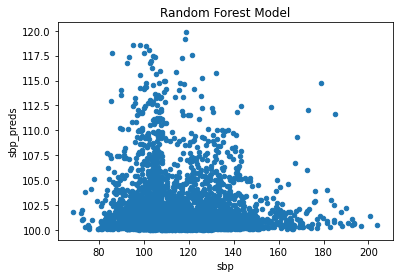

In [ ]:
# %%script false
dfResults = experiments.run_experiment("tmp", dfImu, dfBp, pipe_mvd_fixed, splits_random[:1])
# dfResults = experiments.run_experiment("tmp", dfImu, dfBp, pipe_vect_GradBoost, splits_random)
# dfResults = experiments.run_experiment("tmp", dfImu, dfBp, pipe_TSAI, splits_random[:1])

display(dfResults)
dfResults.plot.scatter('sbp','sbp_preds', title='Random Forest Model')

## Many Experiments

In [ ]:
# !pip install google-cloud-bigquery
# !pip install -U pandas-gbq
# !pip install pandas-gbq -U

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# arr_breath_types = [HLV,LLV,RES,BRE,REC,MIX]
# arr_data_size = [sm, md, lg, all]
arr_splits = {
  "splits_random": splits_random, 
  "splits_query": splits_query, 
  # "splits_group": splits_group,
}
arr_pipelines = {
  "mean" : pipe_mean,
  "random" : pipe_random,
  "analytical_fixed" : pipe_mvd_fixed,
  "analytical" : pipe_mvd,
  "vect_simple_linear" : pipe_vect_simple_linear,
  "vect_simple_rf" : pipe_vect_simple_rf,
  "vect_RF" : pipe_vect_RF,
  "vect_GradBoost" : pipe_vect_GradBoost,
  # "nn_tsai" : pipe_TSAI,
}

bigquery_schema = [
    {'name':'file', 'type' : 'STRING'},
    {'name':'heartbeat', 'type' : 'FLOAT'},
    {'name':'patient', 'type' : 'STRING'},
    {'name':'test_type', 'type' : 'STRING'},
    {'name':'test_num', 'type' : 'STRING'},
    {'name':'pp', 'type' : 'FLOAT'},
    {'name':'sbp', 'type' : 'FLOAT'},
    {'name':'dbp', 'type' : 'FLOAT'},
    {'name':'fold_number', 'type' : 'FLOAT'},
    {'name':'dbp_actuals', 'type' : 'FLOAT'},
    {'name':'dbp_preds', 'type' : 'FLOAT'},
    {'name':'sbp_actuals', 'type' : 'FLOAT'},
    {'name':'sbp_preds', 'type' : 'FLOAT'},
    {'name':'pp_actuals', 'type' : 'FLOAT'},
    {'name':'pp_preds', 'type' : 'FLOAT'},
    {'name':'experiment_id', 'type' : 'INTEGER'},
    {'name':'pipeline', 'type' : 'STRING'},
    {'name':'uploaded_time', 'type' : 'TIMESTAMP'},
]

import datetime
def run_and_save_experiment(id, dfImu, dfBp, pipe, split, dataset='predictions.results'):
  dfResults = experiments.run_experiment(id, dfImu, dfBp, pipe, split)
  dfResults = dfResults.assign(uploaded_time = datetime.datetime.now())
  dfResults = dfResults.fillna(value=np.NaN)

  dfResults.to_csv(f'data/predictions/{id} - date:{datetime.datetime.now()}.csv')
  dfResults.to_gbq(f'predictions.results_{PATTERN}','nipams',
                        if_exists='append', table_schema=None,
                        # if_exists='append', table_schema=bigquery_schema,
                  )


for split_name, split in arr_splits.items():
  for pipe_name, pipe in arr_pipelines.items():
    experiment_name = f'data:{DATA_NAME} - run:{RUN_NAME} - split:{split_name} - pipe:{pipe_name}'
    print("------------------", experiment_name, "------------------")
    print(f"Started : {datetime.datetime.now()}")
    
    dfResults = experiments.run_experiment(experiment_name, dfImu, dfBp, pipe, split)
    dfResults = dfResults.assign(uploaded_time = datetime.datetime.now())
    dfResults = dfResults.fillna(value=np.NaN)
    dfResults.to_csv(f'data/predictions/{experiment_name} - date:{datetime.datetime.now()}.csv')
    dfResults.to_gbq(GBQ_RESULTS_TABLE,'nipams',
                if_exists='append', table_schema=None,
                # if_exists='append', table_schema=bigquery_schema,
    )
    
    # try:
    # run_and_save_experiment(experiment_name, dfImu, dfBp, pipe, split)
    # except Exception as e:
    #   print("ERROR -", e)
    print(f"Ended : {datetime.datetime.now()}")

# experiments.run_and_save_experiment('split:first50%perfile - model:baseline.random', dfImu, dfBp, pipe_random, splits_random)
# experiments.run_and_save_experiment('split:first50%perfile - model:tree', dfImu, dfBp, pipeVectRF, splits_random)
# experiments.run_and_save_experiment('split:first50%perfile - model:tree.gradboost', dfImu, dfBp, pipeVectGradBoost, splits_random)
print(f"DONE! : {datetime.datetime.now()}")

------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:mean ------------------
Started : 2023-02-26 12:19:27.613039
mean_absolute_error, r2_score :  7.908 -1743559841607.232
mean_absolute_error, r2_score :  7.928 -1758482256516.636
mean_absolute_error, r2_score :  7.745 0.0
mean_absolute_error, r2_score :  7.732 -1685549967012.088
mean_absolute_error, r2_score :  14.744 -654970510229.273
mean_absolute_error, r2_score :  14.665 0.0
mean_absolute_error, r2_score :  14.737 0.0
mean_absolute_error, r2_score :  14.858 -6049423633883.726
mean_absolute_error, r2_score :  13.965 -5241432842681.214
mean_absolute_error, r2_score :  14.208 0.0
mean_absolute_error, r2_score :  14.12 -5391094636347.586
mean_absolute_error, r2_score :  14.042 -21339076225488.727


100%|██████████| 1/1 [00:00<00:00, 7182.03it/s]


Ended : 2023-02-26 12:26:15.712454
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:random ------------------
Started : 2023-02-26 12:26:15.712518
mean_absolute_error, r2_score :  11.217 -0.993
mean_absolute_error, r2_score :  11.38 -1.044
mean_absolute_error, r2_score :  11.143 -1.015
mean_absolute_error, r2_score :  11.256 -0.901
mean_absolute_error, r2_score :  20.294 -0.987
mean_absolute_error, r2_score :  20.331 -0.991
mean_absolute_error, r2_score :  20.754 -0.989
mean_absolute_error, r2_score :  20.646 -0.977
mean_absolute_error, r2_score :  19.758 -0.956
mean_absolute_error, r2_score :  19.483 -1.048
mean_absolute_error, r2_score :  19.715 -0.989
mean_absolute_error, r2_score :  19.609 -0.994


100%|██████████| 1/1 [00:00<00:00, 8305.55it/s]


Ended : 2023-02-26 12:33:08.708440
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:analytical_fixed ------------------
Started : 2023-02-26 12:33:08.708541
mean_absolute_error, r2_score :  33.801 -164.586
mean_absolute_error, r2_score :  34.345 -161.979
mean_absolute_error, r2_score :  34.1 -158.369
mean_absolute_error, r2_score :  33.995 -156.129
mean_absolute_error, r2_score :  18.733 -77.204
mean_absolute_error, r2_score :  18.391 -71.698
mean_absolute_error, r2_score :  18.888 -73.998
mean_absolute_error, r2_score :  18.931 -74.274
mean_absolute_error, r2_score :  53.14 -414.502
mean_absolute_error, r2_score :  53.105 -395.984
mean_absolute_error, r2_score :  52.724 -388.128
mean_absolute_error, r2_score :  52.894 -386.372


100%|██████████| 1/1 [00:00<00:00, 9776.93it/s]


Ended : 2023-02-26 13:42:45.876923
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:analytical ------------------
Started : 2023-02-26 13:42:45.877184
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  23.476 -0.091
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  23.361 -0.103
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  23.235 -0.109
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  23.726 -0.112
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  26.133 -0.659
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  25.401 -0.624
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  25.434 -0.632
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  26.569 -0.662
Fitted Parameters :  {'k1': 10000.0, 

100%|██████████| 1/1 [00:00<00:00, 8192.00it/s]


Ended : 2023-02-26 15:05:02.472554
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:vect_simple_linear ------------------
Started : 2023-02-26 15:05:02.472704
mean_absolute_error, r2_score :  7.363 -6.872
mean_absolute_error, r2_score :  7.309 -7.4
mean_absolute_error, r2_score :  7.238 -5.84
mean_absolute_error, r2_score :  7.249 -4.87
mean_absolute_error, r2_score :  13.646 -4.44
mean_absolute_error, r2_score :  13.502 -3.854
mean_absolute_error, r2_score :  13.572 -4.584
mean_absolute_error, r2_score :  13.366 -4.556
mean_absolute_error, r2_score :  12.448 -3.045
mean_absolute_error, r2_score :  12.479 -2.979
mean_absolute_error, r2_score :  12.528 -3.375
mean_absolute_error, r2_score :  12.269 -3.009


100%|██████████| 1/1 [00:00<00:00, 6345.39it/s]


Ended : 2023-02-26 15:06:32.302701
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:vect_simple_rf ------------------
Started : 2023-02-26 15:06:32.302841
mean_absolute_error, r2_score :  2.952 0.754
mean_absolute_error, r2_score :  3.029 0.758
mean_absolute_error, r2_score :  2.957 0.771
mean_absolute_error, r2_score :  2.973 0.76
mean_absolute_error, r2_score :  4.923 0.758
mean_absolute_error, r2_score :  4.845 0.769
mean_absolute_error, r2_score :  4.985 0.753
mean_absolute_error, r2_score :  4.701 0.807
mean_absolute_error, r2_score :  5.214 0.688
mean_absolute_error, r2_score :  5.123 0.702
mean_absolute_error, r2_score :  5.166 0.722
mean_absolute_error, r2_score :  5.076 0.735


100%|██████████| 1/1 [00:00<00:00, 1945.41it/s]


Ended : 2023-02-26 15:10:32.668882
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:vect_RF ------------------
Started : 2023-02-26 15:10:32.670119
mean_absolute_error, r2_score :  4.675 -0.038
mean_absolute_error, r2_score :  3.68 0.558
mean_absolute_error, r2_score :  4.082 0.352
mean_absolute_error, r2_score :  4.986 -0.24
mean_absolute_error, r2_score :  6.546 0.512
mean_absolute_error, r2_score :  7.39 0.32
mean_absolute_error, r2_score :  6.168 0.576
mean_absolute_error, r2_score :  6.774 0.501
mean_absolute_error, r2_score :  6.633 0.444
mean_absolute_error, r2_score :  7.474 0.21
mean_absolute_error, r2_score :  6.186 0.529
mean_absolute_error, r2_score :  6.318 0.518


100%|██████████| 1/1 [00:00<00:00, 7319.90it/s]


Ended : 2023-02-26 15:18:34.162578
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:vect_GradBoost ------------------
Started : 2023-02-26 15:18:34.162788
mean_absolute_error, r2_score :  6.033 -1.709
mean_absolute_error, r2_score :  5.128 -0.128
mean_absolute_error, r2_score :  5.539 -0.725
mean_absolute_error, r2_score :  6.035 -1.843
mean_absolute_error, r2_score :  9.858 -0.45
mean_absolute_error, r2_score :  10.45 -0.933
mean_absolute_error, r2_score :  9.692 -0.408
mean_absolute_error, r2_score :  10.046 -0.646
mean_absolute_error, r2_score :  9.374 -0.435
mean_absolute_error, r2_score :  10.254 -0.975
mean_absolute_error, r2_score :  9.192 -0.349
mean_absolute_error, r2_score :  9.431 -0.481


100%|██████████| 1/1 [00:00<00:00, 7463.17it/s]


Ended : 2023-02-26 15:22:51.230930
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:mean ------------------
Started : 2023-02-26 15:22:51.231081
mean_absolute_error, r2_score :  7.919 0.0
mean_absolute_error, r2_score :  7.891 -1760693835471.679
mean_absolute_error, r2_score :  7.796 -428042731972.272
mean_absolute_error, r2_score :  8.047 -1811897508484.207
mean_absolute_error, r2_score :  15.139 -6378364369112.842
mean_absolute_error, r2_score :  15.083 -723102931213.054
mean_absolute_error, r2_score :  15.07 -1579273448612.826
mean_absolute_error, r2_score :  15.215 -6566554499901.996
mean_absolute_error, r2_score :  13.845 -21053605566894.254
mean_absolute_error, r2_score :  14.016 -21975659343812.695
mean_absolute_error, r2_score :  14.088 -5487395162586.016
mean_absolute_error, r2_score :  14.029 -22624531896944.316


100%|██████████| 1/1 [00:00<00:00, 8490.49it/s]


Ended : 2023-02-26 15:24:58.952869
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:random ------------------
Started : 2023-02-26 15:24:58.955393
mean_absolute_error, r2_score :  11.177 -1.2
mean_absolute_error, r2_score :  10.884 -1.044
mean_absolute_error, r2_score :  10.95 -0.971
mean_absolute_error, r2_score :  11.29 -1.046
mean_absolute_error, r2_score :  20.565 -1.094
mean_absolute_error, r2_score :  20.306 -1.261
mean_absolute_error, r2_score :  20.131 -1.403
mean_absolute_error, r2_score :  19.965 -1.414
mean_absolute_error, r2_score :  20.037 -0.919
mean_absolute_error, r2_score :  19.621 -0.986
mean_absolute_error, r2_score :  19.352 -1.081
mean_absolute_error, r2_score :  19.72 -1.161


100%|██████████| 1/1 [00:00<00:00, 6944.21it/s]


Ended : 2023-02-26 15:27:06.189140
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:analytical_fixed ------------------
Started : 2023-02-26 15:27:06.189480
mean_absolute_error, r2_score :  33.789 -153.225
mean_absolute_error, r2_score :  33.812 -157.18
mean_absolute_error, r2_score :  33.954 -158.175
mean_absolute_error, r2_score :  33.925 -158.242
mean_absolute_error, r2_score :  19.095 -73.681
mean_absolute_error, r2_score :  19.631 -79.197
mean_absolute_error, r2_score :  19.218 -75.999
mean_absolute_error, r2_score :  19.459 -78.652
mean_absolute_error, r2_score :  52.924 -381.569
mean_absolute_error, r2_score :  52.131 -380.855
mean_absolute_error, r2_score :  52.603 -388.987
mean_absolute_error, r2_score :  51.934 -377.621


100%|██████████| 1/1 [00:00<00:00, 787.66it/s]


Ended : 2023-02-26 16:16:54.499691
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:analytical ------------------
Started : 2023-02-26 16:16:54.501345
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  22.976 -0.119
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  24.155 -0.129
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  23.246 -0.106
Fitted Parameters :  {'k1': 10000.0, 'k2': 45.0}
mean_absolute_error, r2_score :  23.592 -0.112
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  24.01 -0.489
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  25.378 -0.543
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  24.873 -0.557
Fitted Parameters :  {'k1': 10000.0, 'k2': 91.0}
mean_absolute_error, r2_score :  24.671 -0.521
Fitted Parameters :  {'k1': 10000.0, 'k

100%|██████████| 1/1 [00:00<00:00, 6955.73it/s]


Ended : 2023-02-26 17:17:47.302003
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:vect_simple_linear ------------------
Started : 2023-02-26 17:17:47.304853
mean_absolute_error, r2_score :  7.727 -5.956
mean_absolute_error, r2_score :  7.847 -5.041
mean_absolute_error, r2_score :  7.83 -5.044
mean_absolute_error, r2_score :  7.558 -6.292
mean_absolute_error, r2_score :  14.725 -3.208
mean_absolute_error, r2_score :  14.463 -4.616
mean_absolute_error, r2_score :  14.25 -4.021
mean_absolute_error, r2_score :  14.6 -4.115
mean_absolute_error, r2_score :  12.814 -2.457
mean_absolute_error, r2_score :  12.923 -3.019
mean_absolute_error, r2_score :  12.711 -2.441
mean_absolute_error, r2_score :  13.042 -3.108


100%|██████████| 1/1 [00:00<00:00, 8019.70it/s]


Ended : 2023-02-26 17:18:33.837912
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:vect_simple_rf ------------------
Started : 2023-02-26 17:18:33.840385
mean_absolute_error, r2_score :  5.711 -0.484
mean_absolute_error, r2_score :  6.17 -0.934
mean_absolute_error, r2_score :  5.825 -0.586
mean_absolute_error, r2_score :  5.394 -0.06
mean_absolute_error, r2_score :  11.7 -0.994
mean_absolute_error, r2_score :  11.566 -1.298
mean_absolute_error, r2_score :  11.599 -1.033
mean_absolute_error, r2_score :  11.789 -1.342
mean_absolute_error, r2_score :  11.027 -0.798
mean_absolute_error, r2_score :  10.499 -0.769
mean_absolute_error, r2_score :  10.773 -0.916
mean_absolute_error, r2_score :  10.32 -0.689


100%|██████████| 1/1 [00:00<00:00, 1935.53it/s]


Ended : 2023-02-26 17:19:28.176976
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:vect_RF ------------------
Started : 2023-02-26 17:19:28.179493
mean_absolute_error, r2_score :  7.614 -8.969
mean_absolute_error, r2_score :  7.875 -5.301
mean_absolute_error, r2_score :  7.369 -5.665
mean_absolute_error, r2_score :  7.48 -5.977
mean_absolute_error, r2_score :  14.48 -4.231
mean_absolute_error, r2_score :  14.358 -5.678
mean_absolute_error, r2_score :  14.173 -8.16
mean_absolute_error, r2_score :  13.685 -3.801
mean_absolute_error, r2_score :  12.542 -3.039
mean_absolute_error, r2_score :  12.782 -2.556
mean_absolute_error, r2_score :  12.765 -4.139
mean_absolute_error, r2_score :  12.639 -2.691


100%|██████████| 1/1 [00:00<00:00, 956.29it/s]


Ended : 2023-02-26 17:20:40.316928
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:vect_GradBoost ------------------
Started : 2023-02-26 17:20:40.317018
mean_absolute_error, r2_score :  7.829 -5.595
mean_absolute_error, r2_score :  7.972 -4.432
mean_absolute_error, r2_score :  7.663 -4.412
mean_absolute_error, r2_score :  7.567 -4.336
mean_absolute_error, r2_score :  14.914 -4.444
mean_absolute_error, r2_score :  15.226 -4.41
mean_absolute_error, r2_score :  14.634 -7.226
mean_absolute_error, r2_score :  14.399 -3.23
mean_absolute_error, r2_score :  12.915 -2.691
mean_absolute_error, r2_score :  13.141 -2.349
mean_absolute_error, r2_score :  13.283 -2.895
mean_absolute_error, r2_score :  13.193 -2.253


100%|██████████| 1/1 [00:00<00:00, 8112.77it/s]

Ended : 2023-02-26 17:21:40.771055
DONE! : 2023-02-26 17:21:40.771368


In [ ]:
#@title Test BigQuery Permissions etc
# %%script false
sql = """
    SELECT name
    FROM `bigquery-public-data.usa_names.usa_1910_current`
    WHERE state = 'TX'
    LIMIT 100
"""

# Run a Standard SQL query using the environment's default project
# df = pd.read_gbq(sql, dialect='standard')

project_id = 'nipams'
df = pd.read_gbq(sql, project_id=project_id, dialect='standard')
df

,name
0,Mary
1,Ruby
2,Annie
3,Willie
4,Ruth
...,...
95,Leona
96,Lucile
97,Lucy
98,Manuela


# ROUGH

In [ ]:
STOP_HERE

NameError: ignored

In [ ]:
GBQ_RESULTS_TABLE

In [ ]:
dfResults.to_gbq(GBQ_RESULTS_TABLE,'nipams',
    if_exists='append', table_schema=None,
    # if_exists='append', table_schema=bigquery_schema,
)

In [ ]:
pipe = pipe_vect_simple
splits = sampleRandTestInds

rfResults1 = experiments.testPipeline(dfImu, dfBp, pipe, splits, targetCol='dbp', verbose=True)
dfBpInd = dfBp.groupby(INDICIES).last()
dfResults1 = create_results_df('dbp', dfBpInd, splits, rfResults1)

rfResults2 = experiments.testPipeline(dfImu, dfBp, pipe, splits, targetCol='sbp', verbose=True)
dfResults2 = create_results_df('sbp', dfBpInd, splits, rfResults2)

dfResults1\
    .merge(dfResults2, left_index=True, right_index=True, suffixes=('','_drop1'))\

In [ ]:
dfResults1\
    .merge(dfResults2, left_index=True, right_index=True, suffixes=('','_drop1'))\

In [ ]:
## create_results_df
target = 'dbp'
results = rfResults1
i=0

col_actual = f'{target}_actuals'
col_pred = f'{target}_preds'
dfTestRes = dfBpInd.copy().assign(fold_number=None, **{col_actual:None, col_pred:None})

df_bp = dfBpInd.loc[splits[i]['test'].set_index(INDICIES).index].reset_index()
dfPreds = pd.DataFrame([results[i]['y_test'].values,results[i]['preds']], index=[col_actual,f'{target}_preds']).T
dfPreds[INDICIES] = splits[i]['test'].reset_index()[INDICIES]


dfRes = pd.merge(df_bp.set_index(INDICIES), dfPreds.set_index(INDICIES), left_index=True, right_index=True,)#.drop_duplicates(INDICIES).set_index(INDICIES)

dfRes = dfRes.assign(fold_number=i)

dfRes

dfTestRes.update(dfRes.drop(columns=BP_COLS))

In [ ]:
display(splits[0]['test'])
display(dfPreds)
display(df_bp)
display("-------------------")

display(splits[0]['test'].drop_duplicates(INDICIES))
display(dfPreds.drop_duplicates(INDICIES))
display(df_bp.drop_duplicates(INDICIES))

# dfTestRes.index.is_unique
# dfTestRes.index.is_unique
# dfRes.index.is_unique




In [ ]:
# dfBp.set_index(INDICIES).loc[sampleRandTestInds[0]['test'].index]
df_bp = dfBp.set_index(INDICIES).loc[sampleRandTestInds[0]['test'].set_index(INDICIES).index].reset_index()
df_bp.groupby(INDICIES).last()

In [ ]:
rfResults1[0]['y_test']

In [ ]:
dfResults1